### correlation matrix & covariance matrix


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv("titanic.csv")

Covariance Matrix:
 [[ 5.35545654e-01 -9.21261732e-01  1.37541600e-01 ...  4.84908854e-01
  -7.62134363e-01  4.59430981e-01]
 [-9.21261732e-01  1.59432275e+00 -2.09519564e-01 ... -8.37343936e-01
   1.34286770e+00 -8.25496183e-01]
 [ 1.37541600e-01 -2.09519564e-01  7.10412099e-01 ...  8.71716998e-04
   1.98136105e-01 -1.37948148e-02]
 ...
 [ 4.84908854e-01 -8.37343936e-01  8.71716998e-04 ...  4.62084747e-01
  -7.58865974e-01  4.33868580e-01]
 [-7.62134363e-01  1.34286770e+00  1.98136105e-01 ... -7.58865974e-01
   1.34474744e+00 -7.87329490e-01]
 [ 4.59430981e-01 -8.25496183e-01 -1.37948148e-02 ...  4.33868580e-01
  -7.87329490e-01  5.25483444e-01]]

Correlation Matrix:                Age      Fare    Pclass  Survived
Age       1.000000  0.120886 -0.403858 -0.050504
Fare      0.120886  1.000000 -0.549500  0.257307
Pclass   -0.403858 -0.549500  1.000000 -0.338481
Survived -0.050504  0.257307 -0.338481  1.000000


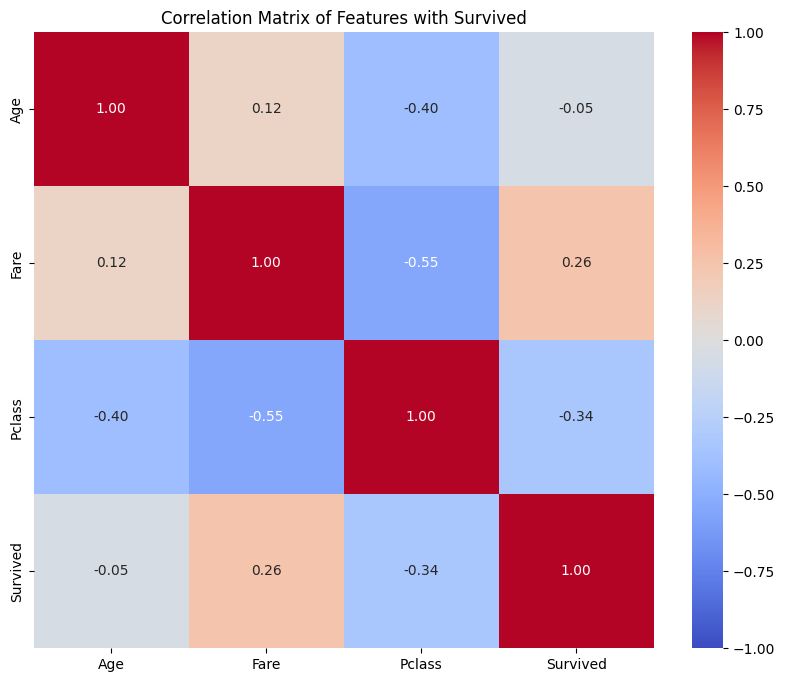

In [3]:
# Fill missing Age values
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda group: group.fillna(group.mean()))

# select numerical features 
features = df[["Age","Fare", "Pclass", "Survived"]]

# normalized features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Calculate covarinace matrix
cov_matrix = np.cov(features_scaled)
print(f"Covariance Matrix:\n {cov_matrix}")

# Calculate correlation matrix
corr_matrix = features_scaled_df.corr()
print(f"\nCorrelation Matrix: {corr_matrix}") 

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with Survived")
plt.show()

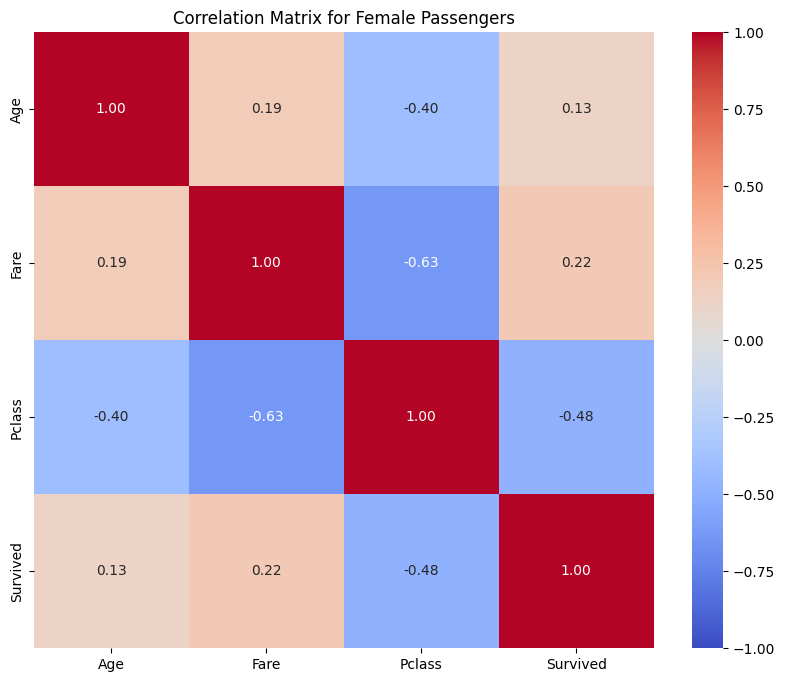

In [4]:
# Correlation for female passengers
female_df = df[df["Sex"] == "female"]
female_features = female_df[["Age", "Fare", "Pclass", "Survived"]]
female_features_scaled = scaler.fit_transform(female_features)
female_features_scaled_df = pd.DataFrame(female_features_scaled, columns=female_features.columns)
female_corr = female_features_scaled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(female_corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Female Passengers")
plt.show()

In [5]:
def custom_cov(x, y):
    mean_x = x.mean()
    mean_y = y.mean()
    n = len(x)
    covariance = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / (n - 1)
    return covariance


# استفاده از تابع
age = features_scaled_df["Age"]
survived = features_scaled_df["Survived"]
cov_manual = custom_cov(age, survived)
print("Manual Covariance (Age, Survived):", cov_manual)

# مقایسه با np.cov
print("np.cov Covariance (Age, Survived):", cov_matrix[0, 3])

Manual Covariance (Age, Survived): -0.050560334482829344
np.cov Covariance (Age, Survived): -0.8683788064607392


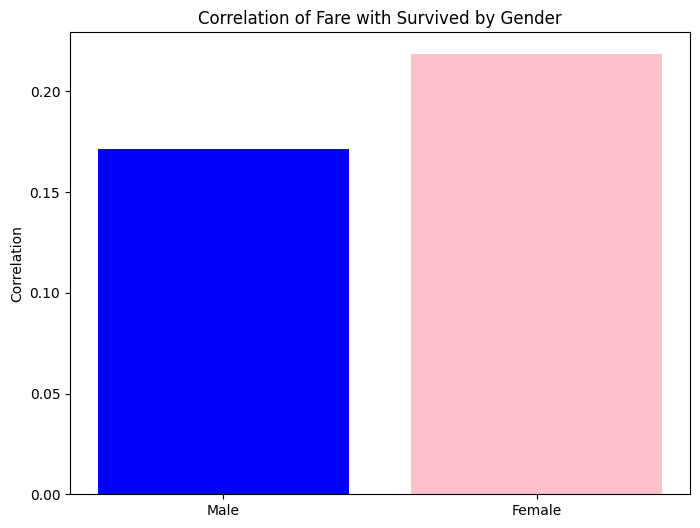

In [6]:
male_df = df[df["Sex"] == "male"]
male_features = male_df[["Fare", "Survived"]]
male_features_scaled = scaler.fit_transform(male_features)
male_corr = pd.DataFrame(male_features_scaled, columns=male_features.columns).corr().iloc[0, 1]

female_corr = female_features_scaled_df[["Fare", "Survived"]].corr().iloc[0, 1]

plt.figure(figsize=(8, 6))
plt.bar(["Male", "Female"], [male_corr, female_corr], color=["blue", "pink"])
plt.title("Correlation of Fare with Survived by Gender")
plt.ylabel("Correlation")
plt.show()

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_martix, annot=True, cmap="magma", fmt=".2f", vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title("Custom Correlation Heatmap")
plt.show()

NameError: name 'corr_martix' is not defined

<Figure size 1000x800 with 0 Axes>